# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#Para entender qué contiene la data 
mouse_metadata.head()
study_results.head()
#Hacer el merge
df= pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
df.head()
# Display the data table for preview
df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice.
# total_number_mice = len(df["Mouse ID"]) para sacar total de datos en la columna 
unique_number_mice = len(df["Mouse ID"])
unique_number_mice

1893

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_id_Count=len(df["Mouse ID"])
print("Mice ID Count =",mice_id_Count)

timepoint_count=len(df["Timepoint"])
print("Timepoint =",timepoint_count)




Mice ID Count = 1893
Timepoint = 1893


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = df[df.duplicated(subset='Mouse ID')]['Mouse ID'].unique()

# Filter the DataFrame to get all data for the duplicate mouse IDs
duplicate_data = df[df['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
5,h246,0,45.000000,0,Ketapril,Male,13,30
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_unique = df.drop_duplicates(subset=["Mouse ID"])
print("The update numbered of unique mice is" , len(df_unique)) 
df_unique

The update numbered of unique mice is 249


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = len(df_unique["Mouse ID"])
total_mice_clean

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
import numpy as np
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance',
                                              'std': 'Standard Deviation', 'sem': 'SEM'})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(
    columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

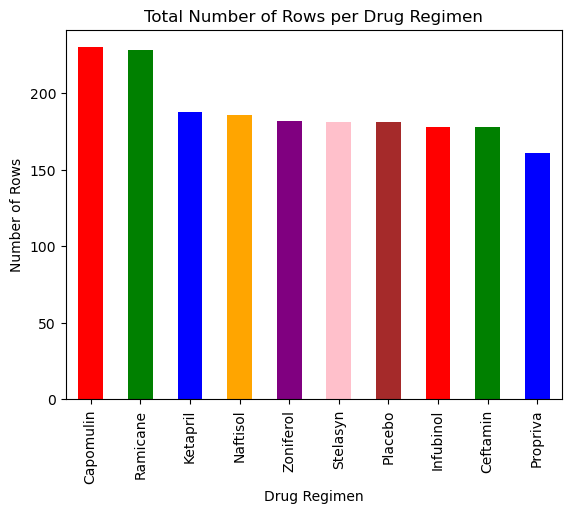

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = df['Drug Regimen'].value_counts()


colors = ['red', 'green', 'blue', 'orange', 'purple','pink','brown']
drug_counts.plot(kind='bar', color=colors)


plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows per Drug Regimen')


plt.show()


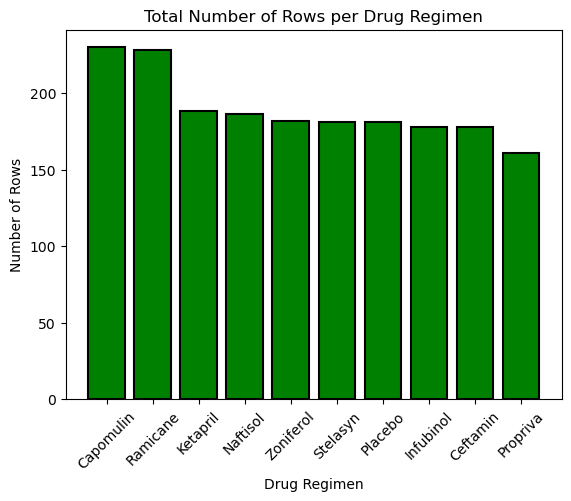

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import pandas as pd
import matplotlib.pyplot as plt



drug_counts = df['Drug Regimen'].value_counts()


x = drug_counts.index
y = drug_counts.values


plt.bar(x, y, color='green', edgecolor='black', linewidth=1.5)


plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows per Drug Regimen')



plt.xticks(rotation=45)

plt.show()

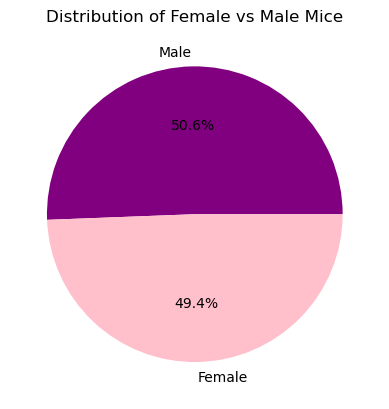

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


gender_counts = df['Sex'].value_counts()


colors = ['purple', 'pink']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)


plt.title('Distribution of Female vs Male Mice')


plt.show()

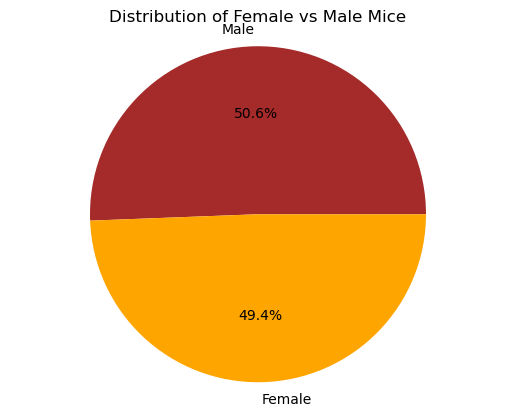

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt


gender_counts = df['Sex'].value_counts()


colors = ['brown', 'orange']
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',  colors=colors)


plt.title('Distribution of Female vs Male Mice')


plt.axis('equal')


plt.show()


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



import pandas as pd



last_timepoint_df = df_unique.groupby('Mouse ID')['Timepoint'].max().reset_index()


merged_df = pd.merge(df, last_timepoint_df, on=['Mouse ID', 'Timepoint'])


print(merged_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']])



    Mouse ID  Timepoint  Tumor Volume (mm3)
0       b128          0                45.0
1       f932          0                45.0
2       g107          0                45.0
3       a457          0                45.0
4       c819          0                45.0
..       ...        ...                 ...
245     t565          0                45.0
246     i557          0                45.0
247     m957          0                45.0
248     f966          0                45.0
249     m601          0                45.0

[250 rows x 3 columns]


Drug Regimen: Capomulin
Potential outliers: [25.47214326 23.34359787]
Drug Regimen: Ketapril
No potential outliers
Drug Regimen: Naftisol
No potential outliers
Drug Regimen: Infubinol
No potential outliers
Drug Regimen: Stelasyn
Potential outliers: [75.12368955]
Drug Regimen: Ramicane
Potential outliers: [22.05012627]
Drug Regimen: Propriva
Potential outliers: [71.17246321 70.49278763 72.45542116 70.16774899]
Drug Regimen: Zoniferol
No potential outliers
Drug Regimen: Placebo
No potential outliers
Drug Regimen: Ceftamin
No potential outliers


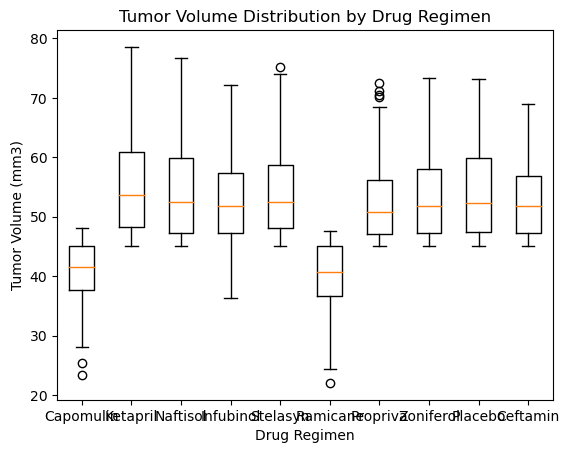

In [22]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds




tumor_vol_data = []


drug_regimens = df_unique['Drug Regimen'].unique()

for regimen in drug_regimens:
  
    tumor_volumes = df.loc[df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']
    
   
    tumor_vol_data.append(tumor_volumes)
    

    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    
 
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    

    print(f"Drug Regimen: {regimen}")
    if len(outliers) > 0:
        print(f"Potential outliers: {outliers.values}")
    else:
        print("No potential outliers")


plt.boxplot(tumor_vol_data, labels=drug_regimens)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.show()





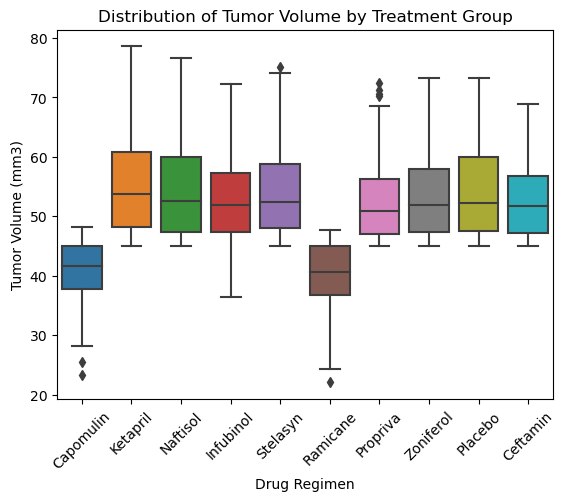

In [23]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import seaborn as sns
import matplotlib.pyplot as plt



sns.boxplot(x='Drug Regimen', y='Tumor Volume (mm3)', data=df)


plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume by Treatment Group')


plt.xticks(rotation=45)


plt.show()


## Line and Scatter Plots

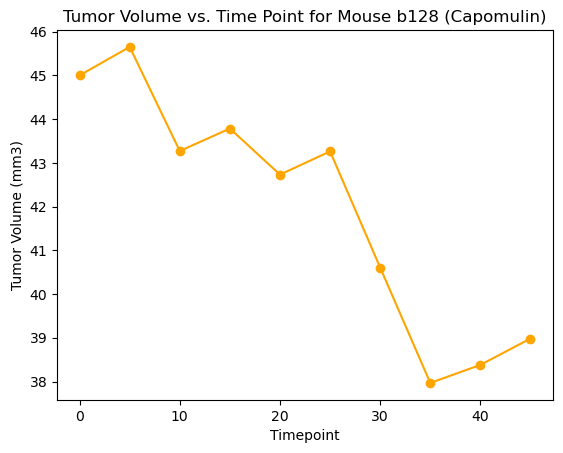

In [24]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt


mouse_id = 'b128'
capomulin_df = df.loc[(df['Drug Regimen'] == 'Capomulin') & (df['Mouse ID'] == mouse_id)]


plt.plot(capomulin_df['Timepoint'], capomulin_df['Tumor Volume (mm3)'], marker='o',color='orange')


plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')


plt.show()


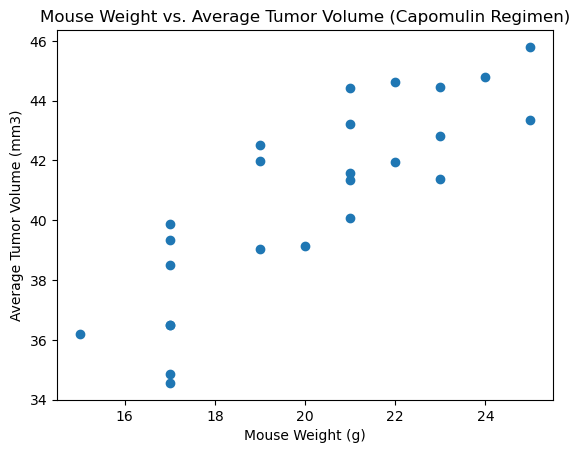

In [25]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


capomulin_data = df[df['Drug Regimen'] == 'Capomulin']


average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()


plt.scatter(mouse_weight, average_tumor_volume)


plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')


plt.show()


## Correlation and Regression

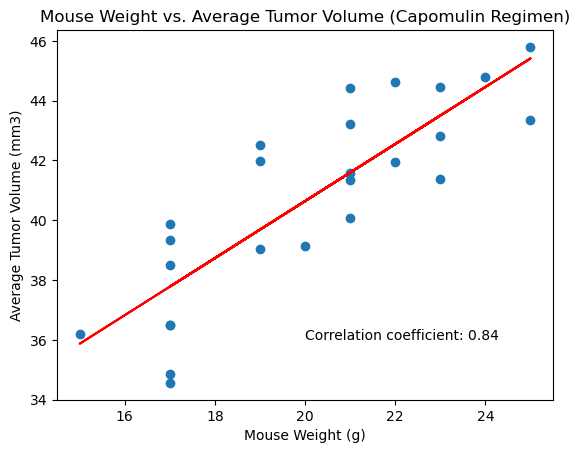

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


from scipy.stats import linregress



capomulin_data = df[df['Drug Regimen'] == 'Capomulin']


average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()


correlation = np.corrcoef(mouse_weight, average_tumor_volume)[0, 1]


slope, intercept, _, _, _ = linregress(mouse_weight, average_tumor_volume)


plt.scatter(mouse_weight, average_tumor_volume)


regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')


plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')


plt.text(20, 36, f'Correlation coefficient: {correlation:.2f}', fontsize=10)


plt.show()

